# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [23]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

Grade 8 math 

How many years of data are logged in our dataset? 

In [24]:
print("number of years ",df["YEAR"].nunique())


number of years  13


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?



In [12]:
michigan_rows = df[df.isin(["MICHIGAN"]).any(axis=1)]
ohio_rows = df[df.isin(["OHIO"]).any(axis=1)]

print(michigan_rows.AVG_MATH_8_SCORE.mean())
print(ohio_rows.AVG_MATH_8_SCORE.mean())

if michigan_rows.AVG_MATH_8_SCORE.mean() > ohio_rows.AVG_MATH_8_SCORE.mean():
    print("michigan has higher outcome scores")
else:
    print("ohio has higher outcome scores")

276.1666666666667
282.25
ohio has higher outcome scores


Find the average for your outcome score across all states in 2019

In [33]:

df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [34]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade MATH Score')

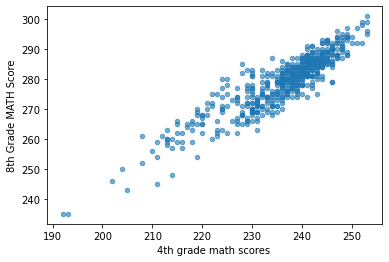

In [37]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th grade math scores ')
plt.ylabel('8th Grade MATH Score')

Here i was trying to figure out if there is any correlation between the math scores in 4th grade students and their scores in 8th grade, as we can clearly see, students that scored higher grades in 4th grade also tend to score higher in their 8th grade. 

**Visualization 2**

Text(0, 0.5, '8th Grade MATH Score')

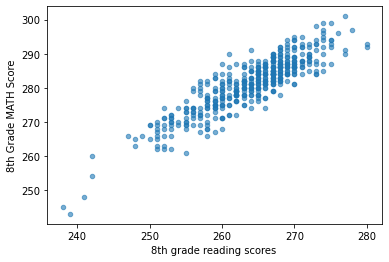

In [38]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th grade reading scores ')
plt.ylabel('8th Grade MATH Score')

Here i  was trying to see the correlation between the reading scores and the math scores of grade 8 students, as we can see, highter the reading scores, highter the math scores, indiciating a strong positive correlation. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X = df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

y.fillna(y.median(), inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [43]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [44]:
# create your model here
# model = 
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [57]:
print("model score", model.score(X_test, y_test))
print('mean erorr',np.mean(model.predict(X_test)-y_test))
print('mean absolute error',np.mean(np.abs(model.predict(X_test)-y_test)))

model score 0.6574448004032422
mean erorr 1.7991307592507155
mean absolute error 1.7991307592507155


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

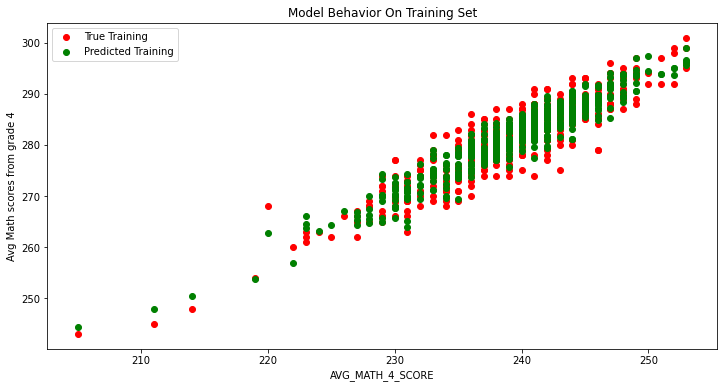

In [54]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Avg Math scores from grade 4')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

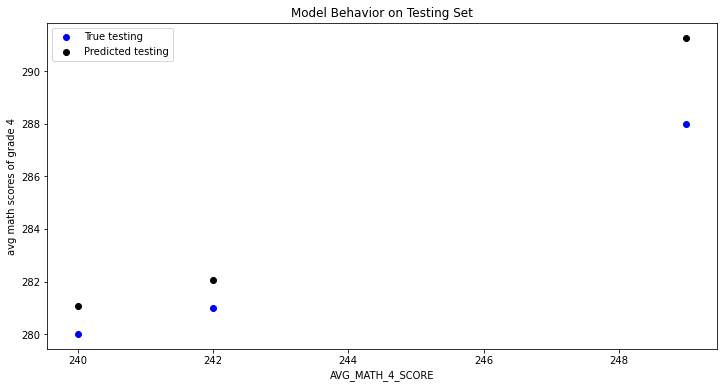

In [56]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('avg math scores of grade 4')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

We can tell there is a strong correlation between the verage math scores of the 4th graes and their 8th grade math scores. for our model we have 

model score: 0.6574448004032422
mean erorr 1.7991307592507155
mean absolute error 1.7991307592507155. 

from the above values we can tell that our model is not the best, as the mean erorr is 1.7 